In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('bikeshare.csv')
df.head()

rand_state = 1000

In [3]:
df.isnull().sum()/len(df)

season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
notbizday     0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
dteday        0.0
cnt           0.0
dtype: float64

In [135]:
sum(df.duplicated())

0

In [136]:
df.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
notbizday       2
weathersit      4
temp           50
hum            89
windspeed      30
dteday        731
cnt           869
dtype: int64

In [137]:
from sklearn.preprocessing import LabelEncoder

# changing the following columns to label encoding:
labeled_categoricals = ['dteday']

le = LabelEncoder()
le.fit_transform(df['dteday'])

mappings = {}
for column in labeled_categoricals:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    mappings[column] = le.classes_

In [138]:
df[labeled_categoricals] = df[labeled_categoricals].astype('category')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  int64   
 1   yr          17379 non-null  int64   
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  int64   
 5   weekday     17379 non-null  int64   
 6   notbizday   17379 non-null  int64   
 7   weathersit  17379 non-null  int64   
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  category
 12  cnt         17379 non-null  int64   
dtypes: category(1), float64(3), int64(9)
memory usage: 1.6 MB


#### Random Forest Regression

In [139]:
y = df['cnt']
X = df.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [87]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)


In [88]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,22.26
4418,47,63.97
7141,11,5.59
14765,205,200.47
16541,65,79.75


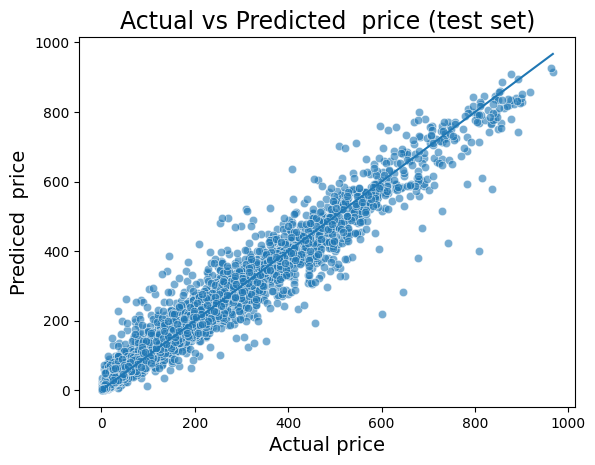

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs Predicted  price (test set)', fontsize=17)
plt.show()

The actual vs predicted does fit along the line fairly weel so i am satisfied with the model's performance. There is some room for improvement. 

In [90]:
np.round(RF_regression.score(X_test, y_test),4)

0.9525

In [91]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

40.27

#### Tuning Hyperparameters

In [92]:
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state, n_jobs=-1),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [95]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [96]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [97]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      n_jobs=-1, random_state=1000)

In [98]:
y_hat_optimized = grid.predict(X_test)

In [99]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
4495,26,22.26,21.904638
4418,47,63.97,53.402590
7141,11,5.59,14.556000
14765,205,200.47,305.465257
16541,65,79.75,130.775171


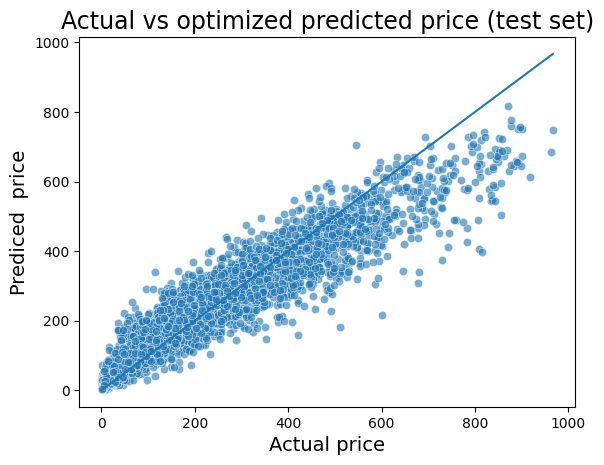

In [100]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [101]:
np.round(grid.score(X_test, y_test),4)

0.894

In [102]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

60.17

Based on the parameters in the grid search I was not able to improve on the previous model. The model is using 20 depth which isn't the bushiest tree but it isn't the smallest either. 

#### Cross Validated

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [105]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.8849

#### Out of Bag

In [106]:
np.random.choice(100,size=100)

array([ 8,  5, 34,  5, 48, 84, 99, 90,  2, 53, 14, 30, 20, 79, 64, 62, 10,
       88, 53, 32, 65, 53, 65,  9, 53, 73, 71, 98, 79, 57, 46,  9, 71, 94,
       91, 64, 35, 92, 74, 64, 68, 14, 57, 29, 19, 51, 38, 78, 49, 73, 38,
       94, 47,  0, 20, 53, 34, 93, 49, 41, 20, 89, 67, 77, 68, 51, 83, 81,
       48, 24, 39, 50, 54, 73, 27,  3, 28, 67, 88, 50, 65,  0, 60,  6, 93,
       89, 38, 63, 88, 16,  9,  7, 62, 16, 91, 36, 55, 50,  0, 34])

In [107]:
np.unique(np.random.choice (100,size=100)).size

60

In [108]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [109]:
RF_oob.oob_score_

0.895904489285715

The out of bag accuracy was slightly better than the cross validated accuracy but were very similar the tuned models accuracy

#### Feature Importance

In [110]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'dteday']

In [111]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [112]:
RF_regression.feature_names_in_

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday'], dtype=object)

In [113]:
RF_Regressor.feature_importances_

array([0.02739333, 0.02732733, 0.02954614, 0.46699938, 0.00249153,
       0.0331777 , 0.02839815, 0.01940486, 0.11464182, 0.09509719,
       0.03668263, 0.11883993])

In [114]:
feature_importance_df = pd.DataFrame({'Features': RF_regression.feature_names_in_, 'Feature_importance':RF_Regressor.feature_importances_}).sort_values(by='Feature_importance')
feature_importance_df

,Features,Feature_importance
4,holiday,0.002492
7,weathersit,0.019405
1,yr,0.027327
0,season,0.027393
6,notbizday,0.028398
2,mnth,0.029546
5,weekday,0.033178
10,windspeed,0.036683
9,hum,0.095097
8,temp,0.114642


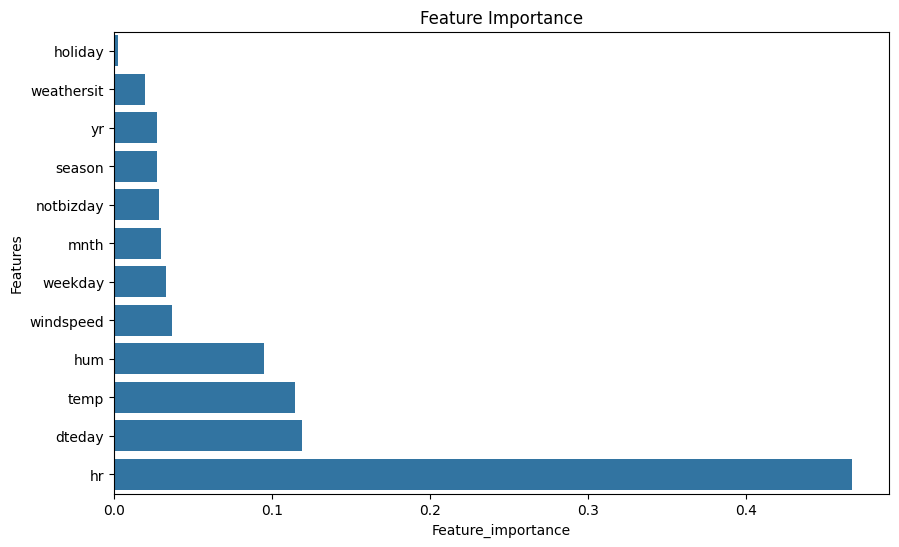

In [115]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=feature_importance_df)
plt.show()

#### Linear Regression

In [118]:
df.info()

categorics = ['cnt']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  int64   
 1   yr          17379 non-null  int64   
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  int64   
 5   weekday     17379 non-null  int64   
 6   notbizday   17379 non-null  int64   
 7   weathersit  17379 non-null  int64   
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  category
 12  cnt         17379 non-null  int64   
dtypes: category(1), float64(3), int64(9)
memory usage: 1.6 MB


In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [123]:
X_train_sc= scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [126]:
# we can convert them to dataframes again:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_train_sc = X_train.reset_index(drop=True)
X_train_sc.head(10)

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday
0,2,0,4,8,0,5,0,3,-0.815280,1.258339,-0.211685,97
1,1,1,12,2,0,4,0,2,-1.334609,1.258339,2.106440,726
2,1,0,1,4,0,4,0,1,-1.230743,-0.348463,-0.211685,19
3,1,0,2,4,0,6,1,3,-1.438475,1.569333,-0.456086,35
4,4,0,9,14,0,2,0,2,0.950439,0.843681,-0.699669,269
5,2,0,6,4,0,3,0,1,0.638841,1.051010,-1.553844,158
6,3,1,8,15,0,6,1,2,0.742707,0.532687,1.130474,602
7,1,1,1,6,0,0,1,2,-1.750072,0.584519,0.276298,386
8,2,0,5,10,0,2,0,1,1.054305,-0.089301,1.130474,143
9,1,0,2,13,0,4,0,1,-1.542341,-1.177780,1.862040,33


In [127]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)
X_test_sc = X_test.reset_index(drop=True)
X_test_sc.head(10)

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday
0,3,0,7,5,0,1,0,1,0.846573,0.584519,-0.456086,191
1,3,0,7,0,0,5,0,1,1.262036,0.169861,-0.699669,188
2,4,0,10,4,0,0,1,1,-1.438475,0.895513,1.130474,302
3,3,1,9,10,0,3,0,1,0.638841,-0.089301,-0.456086,620
4,4,1,11,23,0,1,0,2,-0.919146,0.169861,-0.699669,695
5,4,1,9,4,0,5,0,3,0.327244,1.310171,-0.699669,636
6,2,0,3,1,0,0,1,2,-1.334609,-0.555792,0.031898,85
7,2,1,5,1,0,6,1,1,0.742707,1.051010,-0.456086,511
8,1,1,3,21,0,0,1,1,0.119512,0.480854,-0.821460,442
9,2,0,4,21,0,0,1,1,-0.295951,1.310171,0.031898,99


In [128]:
import statsmodels.api as sm

In [129]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test_sc)
X_train_wc = sm.add_constant(X_train_sc)

In [130]:
# Fit the model
model = sm.OLS(y_train.reset_index(drop=True),X_train_wc)
statsmodels_reg= model.fit()

In [131]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     633.6
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:14:59   Log-Likelihood:                -77471.
No. Observations:               12165   AIC:                         1.550e+05
Df Residuals:                   12152   BIC:                         1.551e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5750      6.146      2.209      0.027       1.527      25.623
season        19.2928      2.115      9.120      0.000      15.146      23.439
yr           123.4716     53.426      2.311      0.021      18.748     228.195
mnth           3.6450      4.509      0.808      0.419      -5.194      12.484
hr             7.4560      0.196     38.021      0.000       7.072       7.840
holiday      -24.0466      7.879     -3.052      0.002     -39.491      -8.602
weekday        1.7066      0.643      2.654      0.008       0.446       2.967
notbizday     -2.4842      2.857     -0.869      0.385      -8.085       3.117
weathersit    -3.6405      2.275     -1.600      0.110      -8.099       0.818
temp          54.3335      1.378     39.425      0.000      51.632      57.035
hum          -37.6955      1.579    -23.875      0.000     -40.790     -34.601
windspeed      4.7573      1.363      3.491      0.000       2.086       7.428
dteday        -0.1178      0.146     -0.808      0.419      -0.404       0.168
==============================================================================
Omnibus:                     2453.317   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4834.921
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                       4.895   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Of the top 5 features in the classification model all were the same as the linear model except dteday was not significant in the linear model. This is most likely due to dteday not having a linear relationship to the count predictor. 